# CS301 - Intro to Data Science
## Lab 04 - Using Matplotlib for Data Manipulation
### Professor Connor Watson
### Based on notes provided by Professors Aritra Dasgupta, Daming Li, and other online sources

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 999)
import numpy as np

##Visualization Libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

* For a great tutorial on matplotlib, see this video series here by [Corey Schafer](https://www.youtube.com/playlist?list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_)
* Data was retrieved at this [Kaggle link](https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data#DailyDelhiClimateTrain.csv)...according to the description this is for India.

In [4]:
data_dir = 'C:\\Users\\watson\\Documents\\CS301_Planning\\datasets\\'
weather_file = data_dir + 'daily-climate-time-series-data\\DailyDelhiClimateTrain.csv'
df = pd.read_csv(weather_file)
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


* This data set has four numerical columns, and one data column.
* We can find answers to some interesting questions, but we need some manipulation first..
* We have one column for each date...but what if we want the years? Or the months?

In [5]:
df.dtypes

date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

* As of right now, the date column is an object (string), but we need access to the date information.
* Working with dates in pandas is tricky, but let's try it.
* We can use the pd.to_datetime() method for this: [pd.to_datetime() documentation](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.to_datetime.html)

In [7]:
pd.to_datetime(df['date']).head()

0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-05
Name: date, dtype: datetime64[ns]

In [8]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date            datetime64[ns]
meantemp               float64
humidity               float64
wind_speed             float64
meanpressure           float64
dtype: object

In [9]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


* Now that the column is a datetime data type, we can see some interesting things.
* For example, index the column and call the following: df['date'].dt.year
* This will give you each observations' year parsed out as an integer.
* Repeat the same for dt.month:

In [16]:
df['date'].dt.year.head()

0    2013
1    2013
2    2013
3    2013
4    2013
Name: date, dtype: int64

In [17]:
df['date'].dt.month.head()

0    1
1    1
2    1
3    1
4    1
Name: date, dtype: int64

##### Exercise 1 - Assign two new columns 'month' and 'year' into the DataFrame, which contain the months and years parsed out from the 

In [18]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,month,year
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,2013
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,2013
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,2013
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,2013
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,2013


* You may even want to assign a column which is the concatenation of the month and the year.
* Under the [datetime class](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes), there is a method strftime() which converts the datetime object into the specified format code (we use %Y year and %m month)
* This has been integrated into [pandas Series.strftime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.strftime.html)

In [24]:
df['date'].dt.strftime('%Y%m').head()

0    201301
1    201301
2    201301
3    201301
4    201301
Name: date, dtype: object

In [25]:
df['mon-year'] = df['date'].dt.strftime('%Y%m')
df.head(10)

,date,meantemp,humidity,wind_speed,meanpressure,month,year,mon-year
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,2013,201301
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,2013,201301
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,2013,201301
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,2013,201301
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,2013,201301
5,2013-01-06,7.000000,82.800000,1.480000,1018.000000,1,2013,201301
6,2013-01-07,7.000000,78.600000,6.300000,1020.000000,1,2013,201301
7,2013-01-08,8.857143,63.714286,7.142857,1018.714286,1,2013,201301
8,2013-01-09,14.000000,51.250000,12.500000,1017.000000,1,2013,201301
9,2013-01-10,11.000000,62.000000,7.400000,1015.666667,1,2013,201301


* Before we get into plotting, we need to figure out if what we're plotting makes sense.
* Take a look at the meantemp column for August 2014.

##### Exercise 2a - Locate the rows in the dataframe which fall in August 2014

In [30]:
df.loc[(df['mon-year']=='201408')]

,date,meantemp,humidity,wind_speed,meanpressure,month,year,mon-year
577,2014-08-01,33.250000,59.500000,6.500000,998.000000,8,2014,201408
578,2014-08-02,30.125000,77.750000,0.925000,997.125000,8,2014,201408
579,2014-08-03,31.500000,66.250000,5.787500,995.375000,8,2014,201408
580,2014-08-04,30.500000,69.750000,5.100000,996.125000,8,2014,201408
581,2014-08-05,29.750000,77.500000,1.850000,997.500000,8,2014,201408
582,2014-08-06,32.125000,65.000000,5.562500,996.875000,8,2014,201408
583,2014-08-07,31.125000,65.375000,6.950000,997.000000,8,2014,201408
584,2014-08-08,31.000000,67.875000,6.012500,998.375000,8,2014,201408
585,2014-08-09,29.235294,80.470588,6.652941,1001.647059,8,2014,201408
586,2014-08-10,28.500000,89.906250,5.225000,1002.156250,8,2014,201408


* In August 2014, the mean temperature bounces between [27, 31]
* This can only make sense if this measurement is in degrees Celsius (which makes sense because Calsius is a measure commonly used outside of USA.
* However, to put the temperatures into perspective, let's do two things. 
* Change the meantemp column name to meantempC
* Add another column meantempF which is the same observations converted into fahrenheit (remember (X°C × 9/5) + 32 = Y°F

##### Exercise 2b - Change the name of meantemp to meantempC

In [33]:
cols = list(df.columns)
print(cols)
cols[1] = 'meantempC'
print(cols)
df.columns = cols
df.head()

['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure', 'month', 'year', 'mon-year']
['date', 'meantempC', 'humidity', 'wind_speed', 'meanpressure', 'month', 'year', 'mon-year']


,date,meantempC,humidity,wind_speed,meanpressure,month,year,mon-year
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,2013,201301
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,2013,201301
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,2013,201301
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,2013,201301
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,2013,201301


##### Exercise 2c - Using the meantempC column, add a new column meantempF which contains the equivalent values but converted into fahrenheit

In [36]:
# (X°C × 9/5) + 32 = Y°F
df['meantempF'] = (df['meantempC'] * (9/5)) + 32
df.head()

,date,meantempC,humidity,wind_speed,meanpressure,month,year,mon-year,meantempF
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,2013,201301,50.00
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,2013,201301,45.32
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,2013,201301,44.90
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,2013,201301,47.60
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,2013,201301,42.80


##### Exercise 3 - Locate the rows in August 2014. Assign this result to variable 'aug2014'

In [45]:
aug2014 = df.loc[(df['mon-year']=='201408')]
aug2014.head()

,date,meantempC,humidity,wind_speed,meanpressure,month,year,mon-year,meantempF
577,2014-08-01,33.250,59.50,6.5000,998.000,8,2014,201408,91.850
578,2014-08-02,30.125,77.75,0.9250,997.125,8,2014,201408,86.225
579,2014-08-03,31.500,66.25,5.7875,995.375,8,2014,201408,88.700
580,2014-08-04,30.500,69.75,5.1000,996.125,8,2014,201408,86.900
581,2014-08-05,29.750,77.50,1.8500,997.500,8,2014,201408,85.550


* Now that we have the mean temperature in farenheit, we can use Matplotlib to plot the temperature trends.
* Because we are using a trend over time, line chart makes the most sense.
* Although a scatter plot can be considered, using points as the marks implies that the points are disconnected.
* We want to see a continuous trend, and using connected lines will help with that.

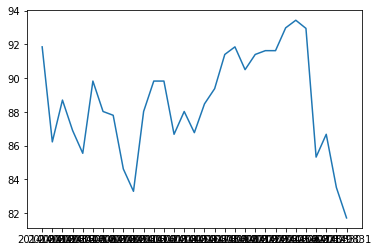

In [48]:
plt.plot(aug2014['date'].dt.strftime('%Y%m%d'), aug2014['meantempF'])
plt.show()

* You can see one major issue with this plot is the x-axis tick labels. We need to fix that.
* In addition, there is no plot title, y-axis label, or a x-axis label
* [plt.gcf()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.gcf.html) returns the current figure such that you can manipulate particular aspects of the figure.
* Figures have many [methods](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure), such as autofmt_xdate() to change the formatting of the x-axis dates. 

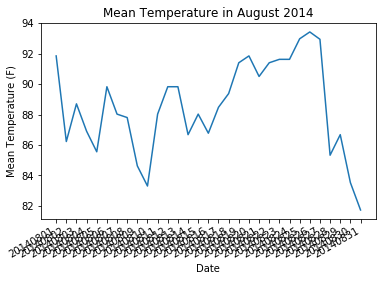

In [50]:
plt.plot(aug2014['date'].dt.strftime('%Y%m%d'), aug2014['meantempF'])
plt.gcf().autofmt_xdate()
plt.ylabel('Mean Temperature (F)')
plt.xlabel('Date')
plt.title('Mean Temperature in August 2014')
plt.show()

* This is slightly better, but there's still more work to do.
* First off, the dates are still not formatted in a way that's easy to read.
* An easy way to fix this is to increase the figure size. (There are better ways, but let's stick with this for now.)
* Figure.set_size_inches(x, y) changes the figure to be equal to x,y inches in dimensions.
* Also, the choice of color is misleading. Blue usually represents cold temperatures...let's change that.
* We can change the line color to red so it more accurately represents hot temperatures.

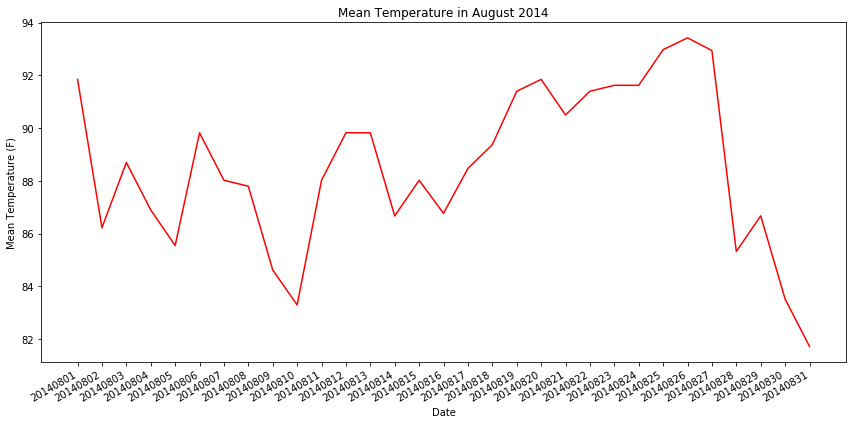

In [67]:
plt.plot(aug2014['date'].dt.strftime('%Y%m%d'), aug2014['meantempF'], color='red')
plt.gcf().autofmt_xdate()
plt.gcf().set_size_inches(12, 6)
plt.ylabel('Mean Temperature (F)')
plt.xlabel('Date')
plt.title('Mean Temperature in August 2014')
plt.tight_layout()
plt.show()

##### Exercise 4a - What does the trend of temperatures look like in February 2016? Visualize this using a line chart.

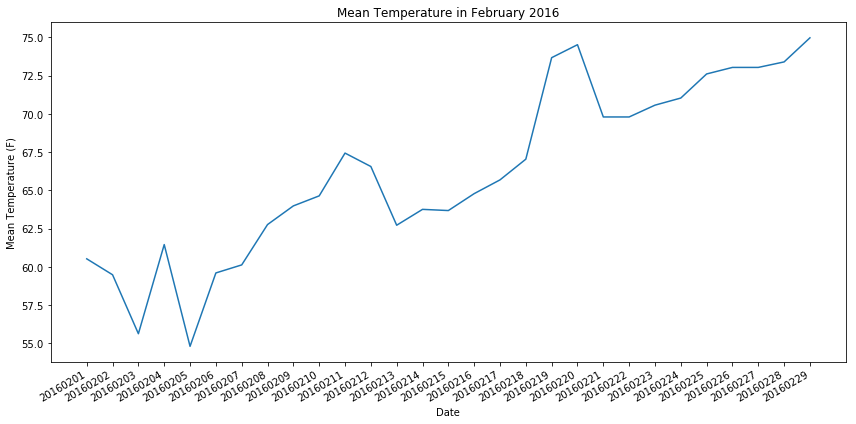

In [105]:
feb2016 = df.loc[(df['mon-year']=='201602')]
plt.plot(feb2016['date'].dt.strftime('%Y%m%d'), feb2016['meantempF'])
plt.gcf().autofmt_xdate()
plt.gcf().set_size_inches(12, 6)
plt.ylabel('Mean Temperature (F)')
plt.xlabel('Date')
plt.title('Mean Temperature in February 2016')
plt.tight_layout()
plt.show()

##### Exercise 4b - What does the trend of temperatures look like in February 2016? How does this compare to February 2015? Visualize this using only one line chart. Assign 2015 to green and 2016 to red.

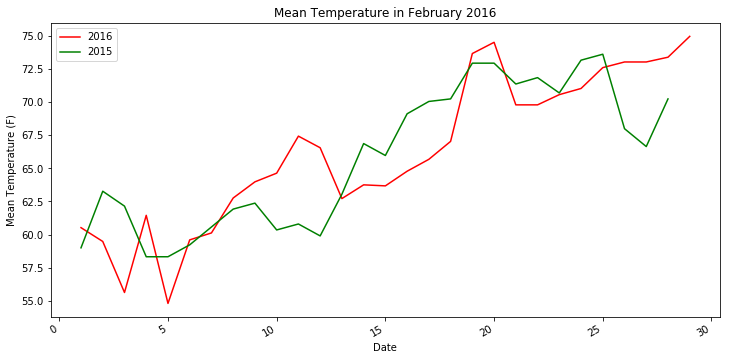

In [167]:
feb2016 = df.loc[(df['mon-year']=='201602')]
feb2015 = df.loc[(df['mon-year']=='201502')]
plt.plot(feb2016['date'].dt.day, feb2016['meantempF'], label='2016', color='red')
plt.plot(feb2015['date'].dt.day, feb2015['meantempF'], label='2015', color='green')
plt.gcf().autofmt_xdate()
plt.gcf().set_size_inches(12, 6)
plt.ylabel('Mean Temperature (F)')
plt.xlabel('Date')
plt.title('Mean Temperature in February 2016')
plt.legend()
plt.show()

##### Exercise 5 - How does temperature change in 2015?

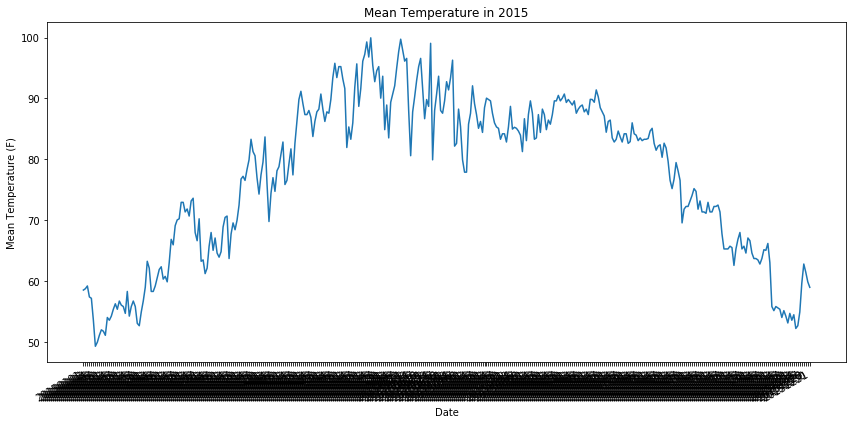

In [70]:
_2015 = df.loc[(df['year']==2015)]
plt.plot(_2015['date'].dt.strftime('%Y%m%d'), _2015['meantempF'])
plt.gcf().autofmt_xdate()
plt.gcf().set_size_inches(12, 6)
plt.ylabel('Mean Temperature (F)')
plt.xlabel('Date')
plt.title('Mean Temperature in 2015')
plt.tight_layout()
plt.show()

* MAJOR problem with the dates here. Increasing the figure size isn't enough.
* Now, we need to consider changing the date frequency. What about weekly? Monthly?
* This way, there are much less dates on the axis, but we can still understand the chart.
* Step one - import some extra libraries. See help [here](https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/customize-dates-matplotlib-plots-python/#modify-frequency-of-date-label-ticks) and [StackOverflow](https://stackoverflow.com/questions/41953648/matplotlib-with-dates-changing-labels-and-ticks-for-monthly-data)

In [71]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

* Now, working with dates and time is always challenging.
* [matplotlib.dates](https://matplotlib.org/3.1.1/api/dates_api.html) has a lot of intersting functions which can help.
* There are two parts: Locators and Formatters. The MonthLocator() locates where the ticks should be every month.
* The DateFormatter allows you change the format about how the dates are printed on the plot.
* [plt.gca()](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.gca.html) gets the axes, which you can then call xaxis.set_major_locator() and xaxis.set_major_formatter() to actually change the axes.

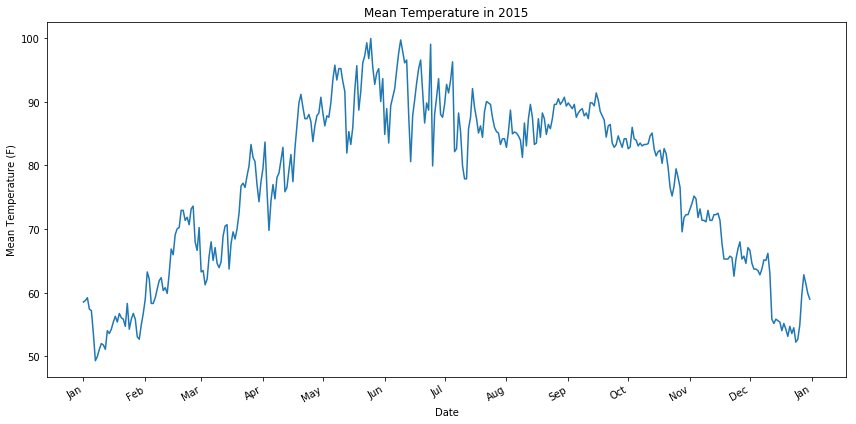

In [96]:
months = mdates.MonthLocator()
monthsFmt = mdates.DateFormatter('%b')

plt.plot(_2015['date'], _2015['meantempF'])
plt.gcf().autofmt_xdate()
plt.gcf().set_size_inches(12, 6)
plt.ylabel('Mean Temperature (F)')
plt.xlabel('Date')
plt.title('Mean Temperature in 2015')
plt.gca().xaxis.set_major_locator(months)
plt.gca().xaxis.set_major_formatter(monthsFmt)
plt.tight_layout()
plt.show()

##### Exercise 6 - Now, let's change gears. In 2015, find the highest of the mean temperatures for each month. Assign this into monthly_max

In [102]:
monthly_max = _2015.groupby('mon-year')['meantempF'].max().reset_index()
monthly_max

,mon-year,meantempF
0,201501,59.225000
1,201502,73.625000
2,201503,83.300000
3,201504,91.175000
4,201505,99.950000
5,201506,99.725000
6,201507,96.285714
7,201508,90.725000
8,201509,91.400000
9,201510,86.000000


* For this type of problem, although you *can* utilize a line chart, the measure of time is discontinuous, so it makes less sense.
* Because we have separated the data into logical bins, we should consider a bar chart. On the x-axis, we will plot the months, and on the y-axis, the value for the highest of the mean Farhenheit temperature.

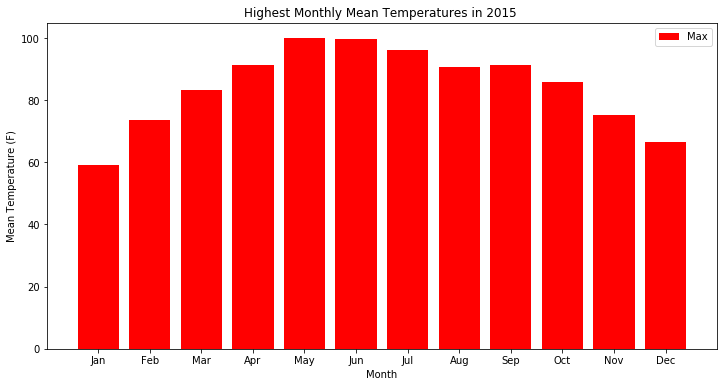

In [119]:
label_locations = np.arange(monthly_max.shape[0])
labs = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.bar(monthly_max['mon-year'], monthly_max['meantempF'], label='Max', color='red')
plt.gcf().set_size_inches(12, 6)
plt.title('Highest Monthly Mean Temperatures in 2015 ')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (F)')
plt.xticks(label_locations, labels=labs)
plt.legend()
plt.show()

* You can also compare two (or more) bars next to each other.

In [117]:
monthly_min = _2015.groupby('mon-year')['meantempF'].min().reset_index()
monthly_min

,mon-year,meantempF
0,201501,49.325
1,201502,58.325
2,201503,61.250
3,201504,69.800
4,201505,81.950
5,201506,79.925
6,201507,77.900
7,201508,81.275
8,201509,82.850
9,201510,69.575


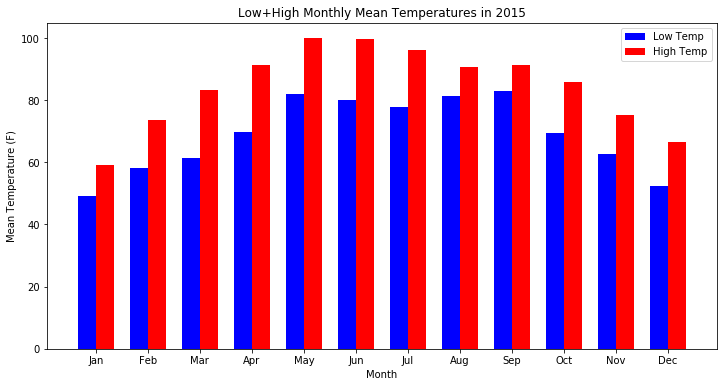

In [121]:
label_locations = np.arange(monthly_max.shape[0])
labs = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

w = 0.35
plt.bar(label_locations - w/2, monthly_min['meantempF'], width=w, label='Low Temp', color='blue')
plt.bar(label_locations + w/2, monthly_max['meantempF'], width=w, label='High Temp', color='red')
plt.gcf().set_size_inches(12, 6)
plt.title('Low+High Monthly Mean Temperatures in 2015')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (F)')
plt.xticks(label_locations, labels=labs)
plt.legend()
plt.show()

##### Exercise 7 - Use a scatter plot to plot meantempF vs meanpressure. Do you see any interesting patterns based off of this visualization? Are there any apparent outliers? Can you think of a way to improve the graph?

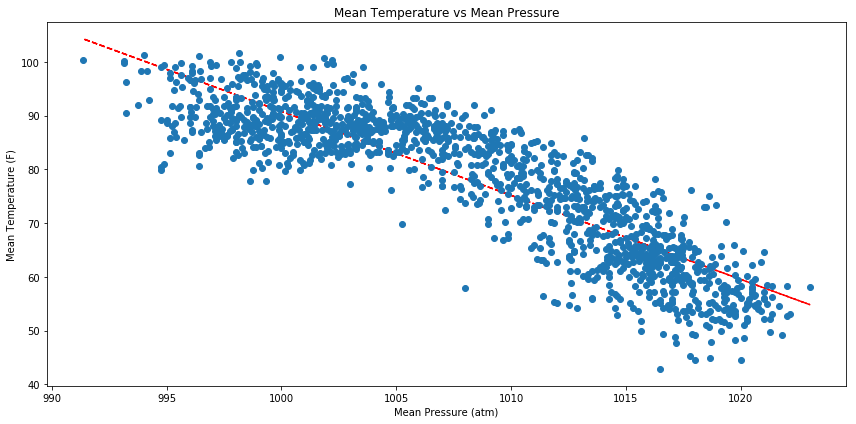

In [149]:
my_df = df.loc[(df['year'].isin(range(2013,2017))) & (df['meanpressure'] < 1200) & (df['meanpressure'] > 980)]
best_fit = np.polyfit(my_df['meanpressure'], my_df['meantempF'], 1)
p = np.poly1d(best_fit)
plt.plot(my_df['meanpressure'], p(my_df['meanpressure'].values), "r--", label='Best Fit')
plt.plot(my_df['meanpressure'], my_df['meantempF'], 'o')
plt.gcf().set_size_inches(12, 6)
plt.ylabel('Mean Temperature (F)')
plt.xlabel('Mean Pressure (atm)')
plt.title('Mean Temperature vs Mean Pressure')
plt.tight_layout()
plt.show()

## Visualization Critique

#### Below, you will see some visualizations. Critique them. What are the data items and attributes? Which marks encode the items? And which channels are utilized? Are these visulizations effective or expressive?

##### Critique 1 - Mean Temperature

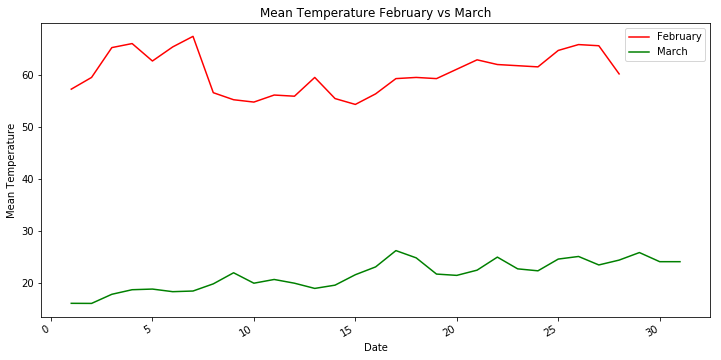

In [168]:
feb2014 = df.loc[(df['mon-year']=='201402')]
mar2014 = df.loc[(df['mon-year']=='201403')]
plt.plot(feb2014['date'].dt.day, feb2014['meantempF'], label='February', color='red')
plt.plot(mar2014['date'].dt.day, mar2014['meantempC'], label='March', color='green')
plt.gcf().autofmt_xdate()
plt.gcf().set_size_inches(12, 6)
plt.ylabel('Mean Temperature')
plt.xlabel('Date')
plt.title('Mean Temperature February vs March')
plt.legend()
plt.show()

##### Critique 2 - Springtime Temperatures

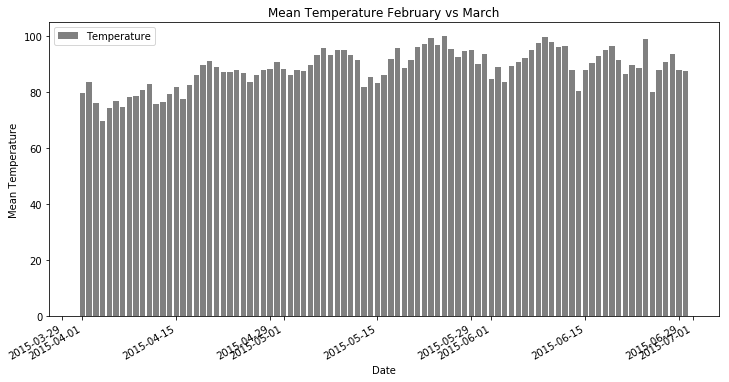

In [173]:
spring = df.loc[(df['mon-year'].isin(['201504', '201505', '201506']))]
plt.bar(spring['date'].dt.date, spring['meantempF'], label='Temperature', color='grey')
plt.gcf().autofmt_xdate()
plt.gcf().set_size_inches(12, 6)
plt.ylabel('Mean Temperature')
plt.xlabel('Date')
plt.title('Mean Temperature February vs March')
plt.legend()
plt.show()

##### Critique 3 - Humidity

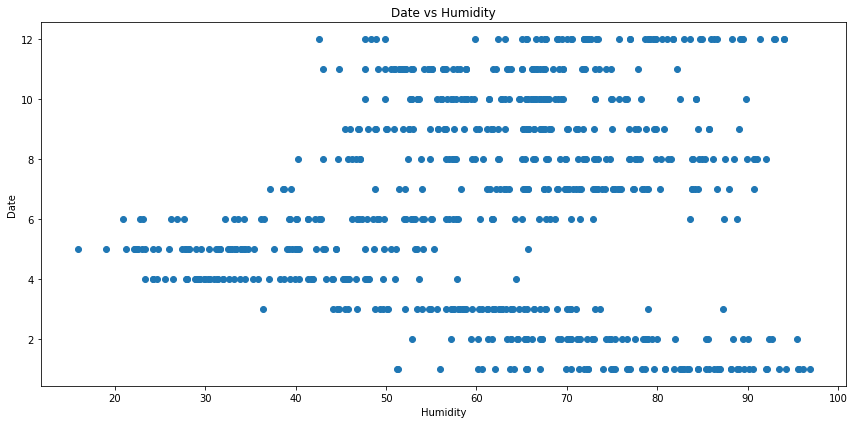

In [179]:
my_df = df.loc[(df['year'].isin(range(2013,2015)))]
plt.plot(my_df['humidity'], my_df['date'].dt.month, 'o')
plt.gcf().set_size_inches(12, 6)
plt.ylabel('Date')
plt.xlabel('Humidity')
plt.title('Date vs Humidity')
plt.tight_layout()
plt.show()